# Supervised Learning - Diabetes Prediction

## Data Preparation

### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Create X and y

In [3]:
X = df.iloc[:, :df.shape[1] - 1].values

In [4]:
y = df.iloc[:, df.shape[1] - 1].values

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

C:\Users\Kunal\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Tools

### Dimensionality Reducation

In [7]:
# Conduct PCA
from sklearn.decomposition import PCA
def pca_2d(X, y=None, ret_x=False):
    pca = PCA(n_components=2)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    if ret_x: return principal_comp.values
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2','target')
    return final_df

def pca_3d(X, y):
    pca = PCA(n_components=3)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2', 'Principal Component 3','target')
    return final_df

### Confusion Matrix Tool

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def prediction_results(y_pred, ret=False):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    print('Accuracy: ' + str(accuracy) + '\n')
    print('Confusion Matrix:')
    print(cm)

    classes=['Diabetes', 'No Diabetes']
    plt.imshow(cm, interpolation='nearest')
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if ret: return cm, accuracy

### Visualization Tools

In [9]:
# Plot 2D
def plot_2d(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [10]:
# Plot 3D
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
    #ax.set_title('3 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , df.loc[indicesToKeep, 'Principal Component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
    
def visualize_classifier(X, y, classifier):

    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classifier Prediction Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

#### 2D Visualization using Principal Component Analaysis

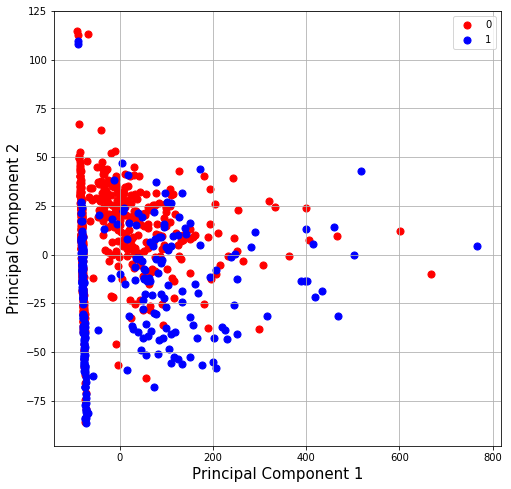

In [12]:
plot_2d(pca_2d(X, y))

#### 3D Visualization using Principal Component Analaysis

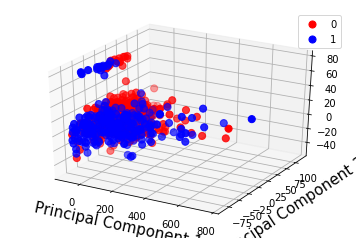

In [13]:
plot_3d(pca_3d(X, y))

#### Visualise Data Distribution using Histogram 

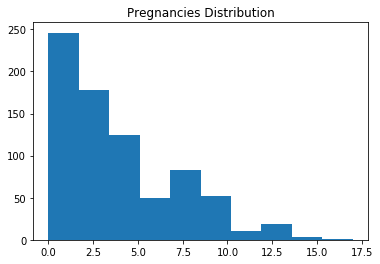

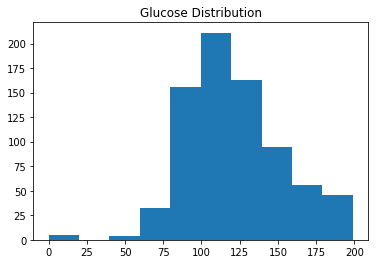

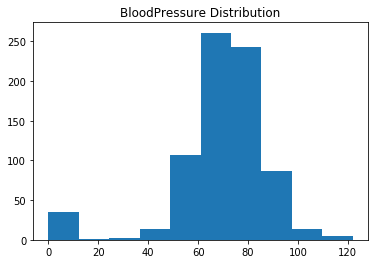

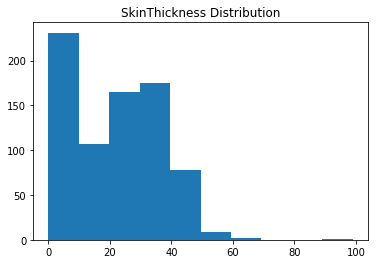

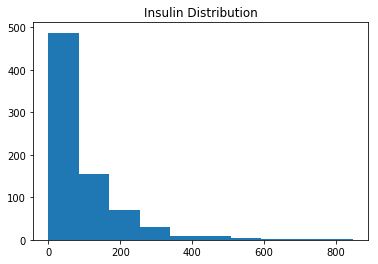

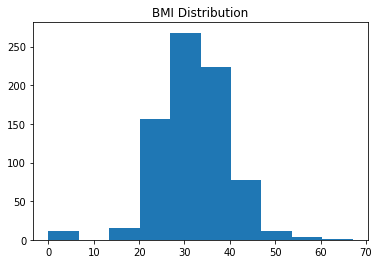

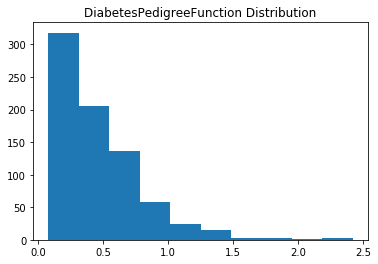

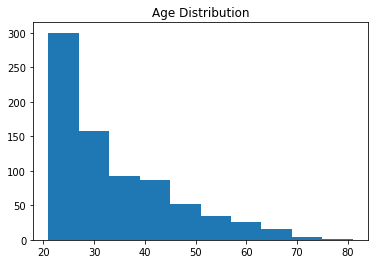

In [14]:
for i in range(0,8):
    plt.hist(X[:,i])
    plt.title(list(df)[i] + " Distribution")
    plt.show()

#### Outcome Distribution

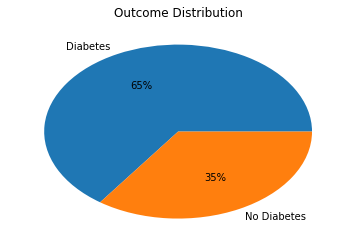

In [15]:
from matplotlib.pyplot import figure
def outcome_distr_pie():
    labels = ['Diabetes', 'No Diabetes']
    plt.pie(np.unique(y, return_counts=True)[1], labels=labels, autopct='%1.0f%%',)
    plt.title('Outcome Distribution')
    plt.show()
    
outcome_distr_pie()

## Classifiers

### Decision Tree with Pruning

#### Fitting Decision Tree Classification to the Training set

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
classifier_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree With Pruning, Classification Results:
Accuracy: 0.7077922077922078

Confusion Matrix:
[[81 18]
 [27 28]]


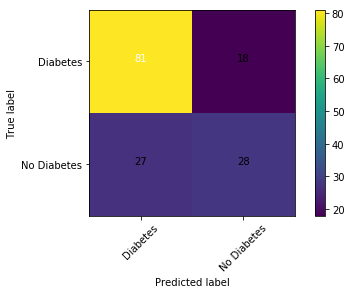

In [17]:
print("Decision Tree With Pruning, Classification Results:")
# Predicting the Test set results
y_pred = classifier_dtree.predict(X_test)
plt.figure()
prediction_results(y_pred)

#### Feature Importance Plot

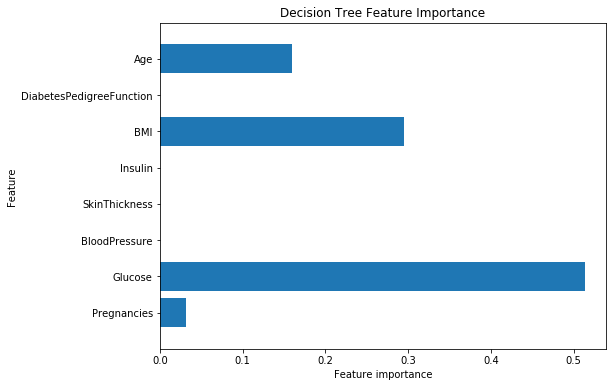

In [18]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
    plt.show()

plot_feature_importances(classifier_dtree)

#### Visualize Decision Tree

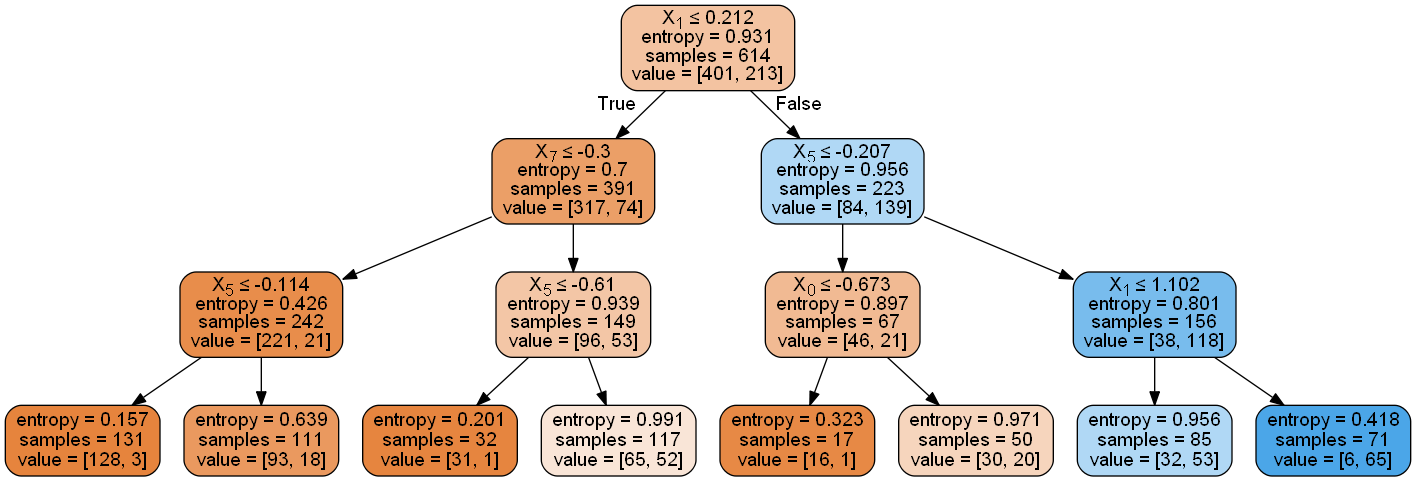

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Boosted Decision Tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
ada_boosted_dt = AdaBoostClassifier(
    base_estimator= classifier_dtree, n_estimators=50)

In [22]:
ada_boosted_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [23]:
# Predicting the Test set results
y_pred = ada_boosted_dt.predict(X_test)

In [24]:
print("AdaBoosted Decision Tree, Classification Results:")

AdaBoosted Decision Tree, Classification Results:


Accuracy: 0.7012987012987013

Confusion Matrix:
[[77 22]
 [24 31]]


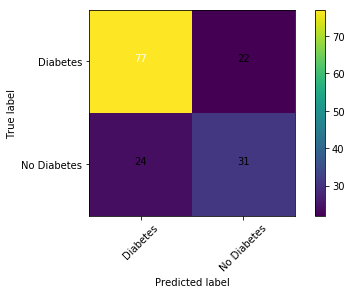

In [25]:
prediction_results(y_pred)

### Artificial Neural Networks

In [26]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Kunal\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
# Initialising the ANN
classifier = Sequential()

In [28]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=8, units=8, kernel_initializer="uniform"))

In [29]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))

In [30]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))

In [31]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 7, epochs = 150)

Epoch 1/150
614/614 [==============================] - 0s 457us/step - loss: 0.6891 - acc: 0.6482
Epoch 2/150
614/614 [==============================] - 0s 155us/step - loss: 0.6818 - acc: 0.6531
Epoch 3/150
614/614 [==============================] - 0s 158us/step - loss: 0.6757 - acc: 0.6531
Epoch 4/150
614/614 [==============================] - 0s 149us/step - loss: 0.6705 - acc: 0.6531
Epoch 5/150
614/614 [==============================] - 0s 160us/step - loss: 0.6661 - acc: 0.6531
Epoch 6/150
614/614 [==============================] - 0s 161us/step - loss: 0.6624 - acc: 0.6531
Epoch 7/150
614/614 [==============================] - 0s 157us/step - loss: 0.6594 - acc: 0.6531
Epoch 8/150
614/614 [==============================] - 0s 152us/step - loss: 0.6570 - acc: 0.6531
Epoch 9/150
614/614 [==============================] - 0s 152us/step - loss: 0.6550 - acc: 0.6531
Epoch 10/150
614/614 [==============================] - 0s 154us/step - loss: 0.6532 - acc: 0.6531
Epoch 11/150
614/61

In [34]:
#Making the predictions and evaluating the model
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [35]:
print("Artificial Neural Network, Classification Results:")

Artificial Neural Network, Classification Results:


Accuracy: 0.6428571428571429

Confusion Matrix:
[[99  0]
 [55  0]]


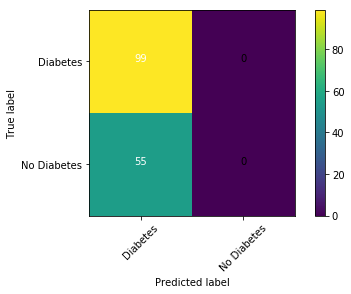

In [36]:
prediction_results(y_pred)

### Support Vector Machine

In [37]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear')
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
# Predicting the Test set results
y_pred = classifier_svm.predict(X_test)

In [39]:
print("Support Vector Machine, Classification Results:")

Support Vector Machine, Classification Results:


Accuracy: 0.7467532467532467

Confusion Matrix:
[[82 17]
 [22 33]]


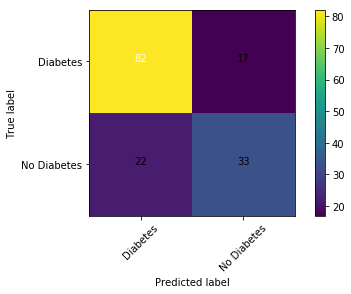

In [40]:
prediction_results(y_pred)

### k-Nearest Neighbors

#### Testing Different K-Values

In [41]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(p=2, n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

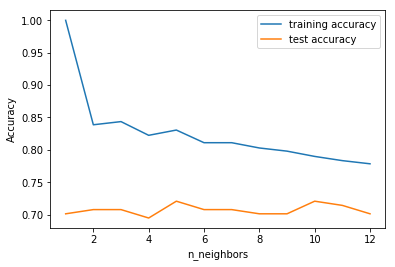

In [42]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Train Model

In [43]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=1, n_neighbors = 11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=1,
           weights='uniform')

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [45]:
print("K-nearest Neighbors, Classification Results:")

K-nearest Neighbors, Classification Results:


Accuracy: 0.6948051948051948

Confusion Matrix:
[[78 21]
 [26 29]]


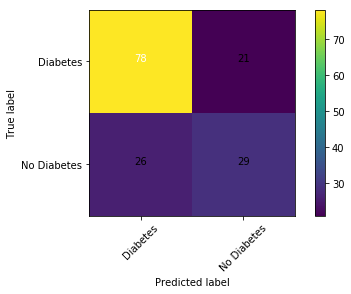

In [46]:
prediction_results(y_pred)

#### Visualize Results

In [47]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_pca = KNeighborsClassifier(n_neighbors = 11)
classifier_pca.fit(pca_2d(X_train, y_train, ret_x=True), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [48]:
# Predicting the Test set results
y_pred = classifier_pca.predict(pca_2d(X_test, ret_x=True))

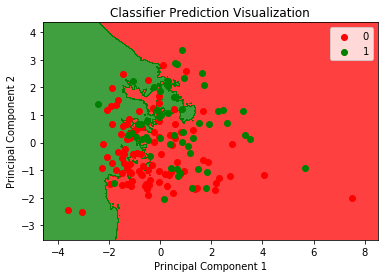

In [49]:
visualize_classifier(pca_2d(X_test, y_test, ret_x=True), y_test, classifier_pca)

# Supervised Learning - Heart Disease Prediction

## Data Preparation

### Importing the Libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [51]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Create X and y

In [52]:
X = df.iloc[:, :df.shape[1] - 1].values

In [53]:
y = df.iloc[:, df.shape[1] - 1].values

### Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Tools

### Dimensionality Reducation

In [56]:
# Conduct PCA
from sklearn.decomposition import PCA
def pca_2d(X, y=None, ret_x=False):
    pca = PCA(n_components=2)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    if ret_x: return principal_comp.values
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2','target')
    return final_df

def pca_3d(X, y):
    pca = PCA(n_components=3)
    principal_comp = pd.DataFrame(pca.fit_transform(X))
    target_df = pd.DataFrame(y)
    final_df = pd.concat([principal_comp, target_df], axis = 1)
    final_df.columns = ('Principal Component 1', 'Principal Component 2', 'Principal Component 3','target')
    return final_df

### Confusion Matrix Tool

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def prediction_results(y_pred, ret=False):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    print('Accuracy: ' + str(accuracy) + '\n')
    print('Confusion Matrix:')
    print(cm)

    classes=['Heart Disease', 'No Heart Disease']
    plt.imshow(cm, interpolation='nearest')
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if ret: return cm, accuracy

### Visualization Tools

In [58]:
# Plot 2D
def plot_2d(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [59]:
# Plot 3D
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
    #ax.set_title('3 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'b', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'Principal Component 1']
                   , df.loc[indicesToKeep, 'Principal Component 2']
                   , df.loc[indicesToKeep, 'Principal Component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [60]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
    
def visualize_classifier(X, y, classifier):

    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classifier Prediction Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

#### 2D Visualization using Principal Component Analaysis

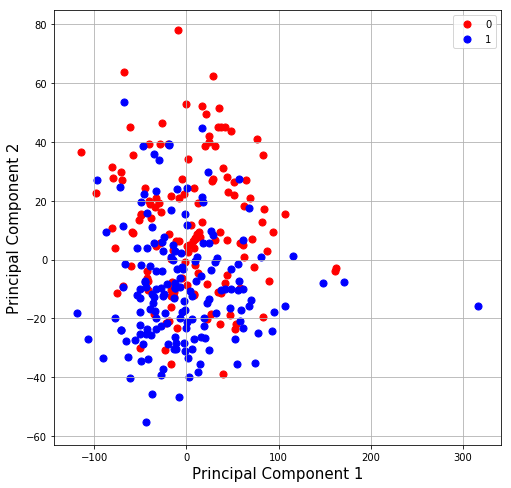

In [61]:
plot_2d(pca_2d(X, y))

#### 3D Visualization using Principal Component Analaysis

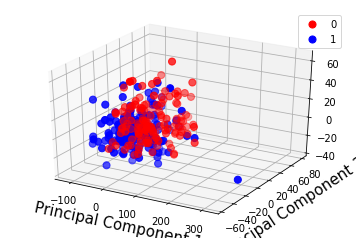

In [62]:
plot_3d(pca_3d(X, y))

#### Visualise Data Distribution using Histogram 

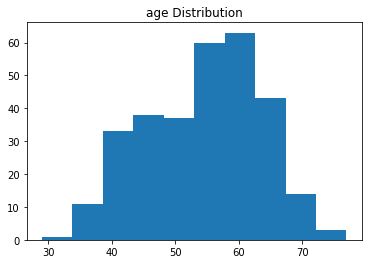

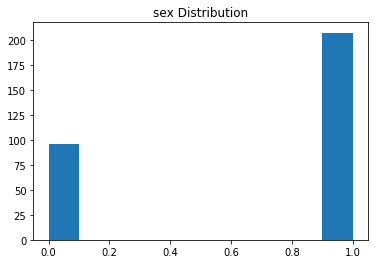

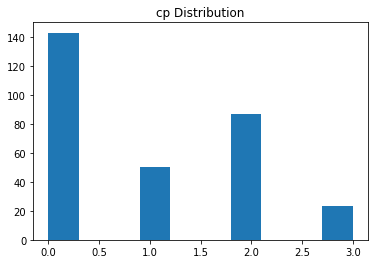

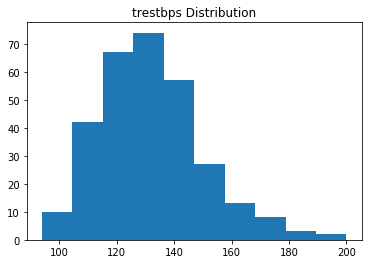

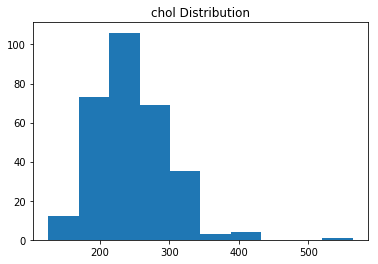

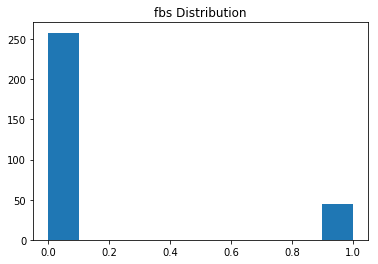

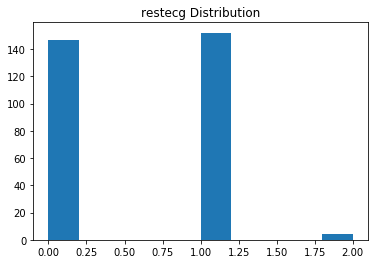

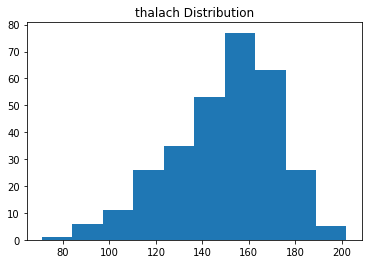

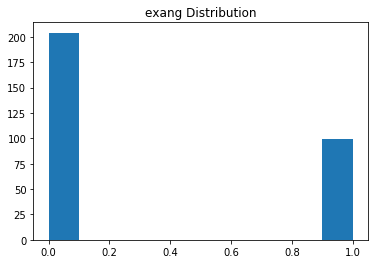

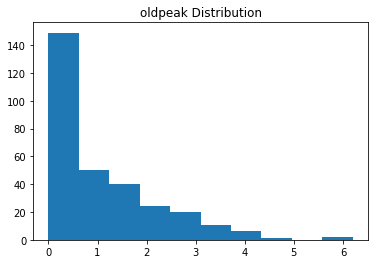

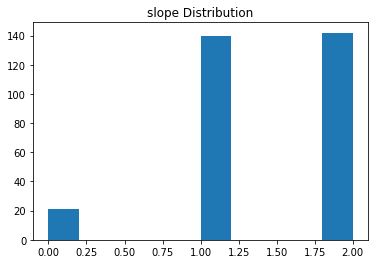

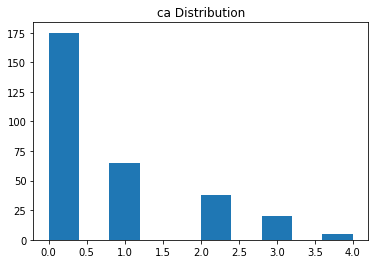

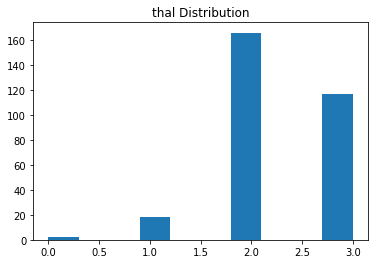

In [63]:
for i in range(0, X.shape[1]):
    plt.hist(X[:,i])
    plt.title(list(df)[i] + " Distribution")
    plt.show()

#### Outcome Distribution

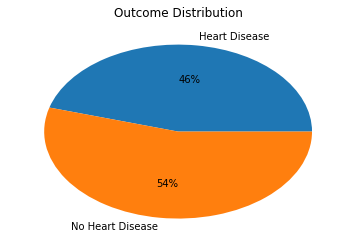

In [64]:
from matplotlib.pyplot import figure
def outcome_distr_pie():
    labels = ['Heart Disease', 'No Heart Disease']
    plt.pie(np.unique(y, return_counts=True)[1], labels=labels, autopct='%1.0f%%',)
    plt.title('Outcome Distribution')
    plt.show()
    
outcome_distr_pie()

## Classifiers

### Decision Tree with Pruning

#### Fitting Decision Tree Classification to the Training set

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
classifier_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree With Pruning, Classification Results:
Accuracy: 0.7868852459016393

Confusion Matrix:
[[17  4]
 [ 9 31]]


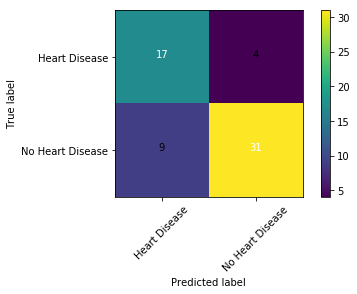

In [66]:
print("Decision Tree With Pruning, Classification Results:")
# Predicting the Test set results
y_pred = classifier_dtree.predict(X_test)
plt.figure()
prediction_results(y_pred)

#### Feature Importance Plot

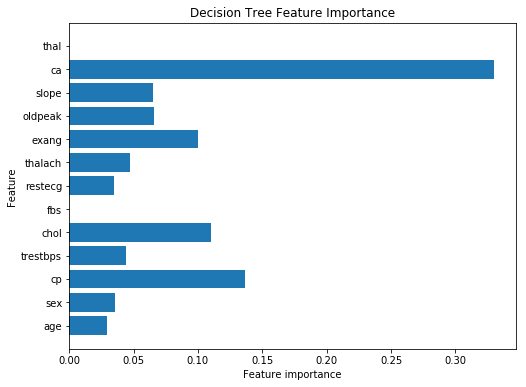

In [67]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
    plt.show()

plot_feature_importances(classifier_dtree)

#### Visualize Decision Tree

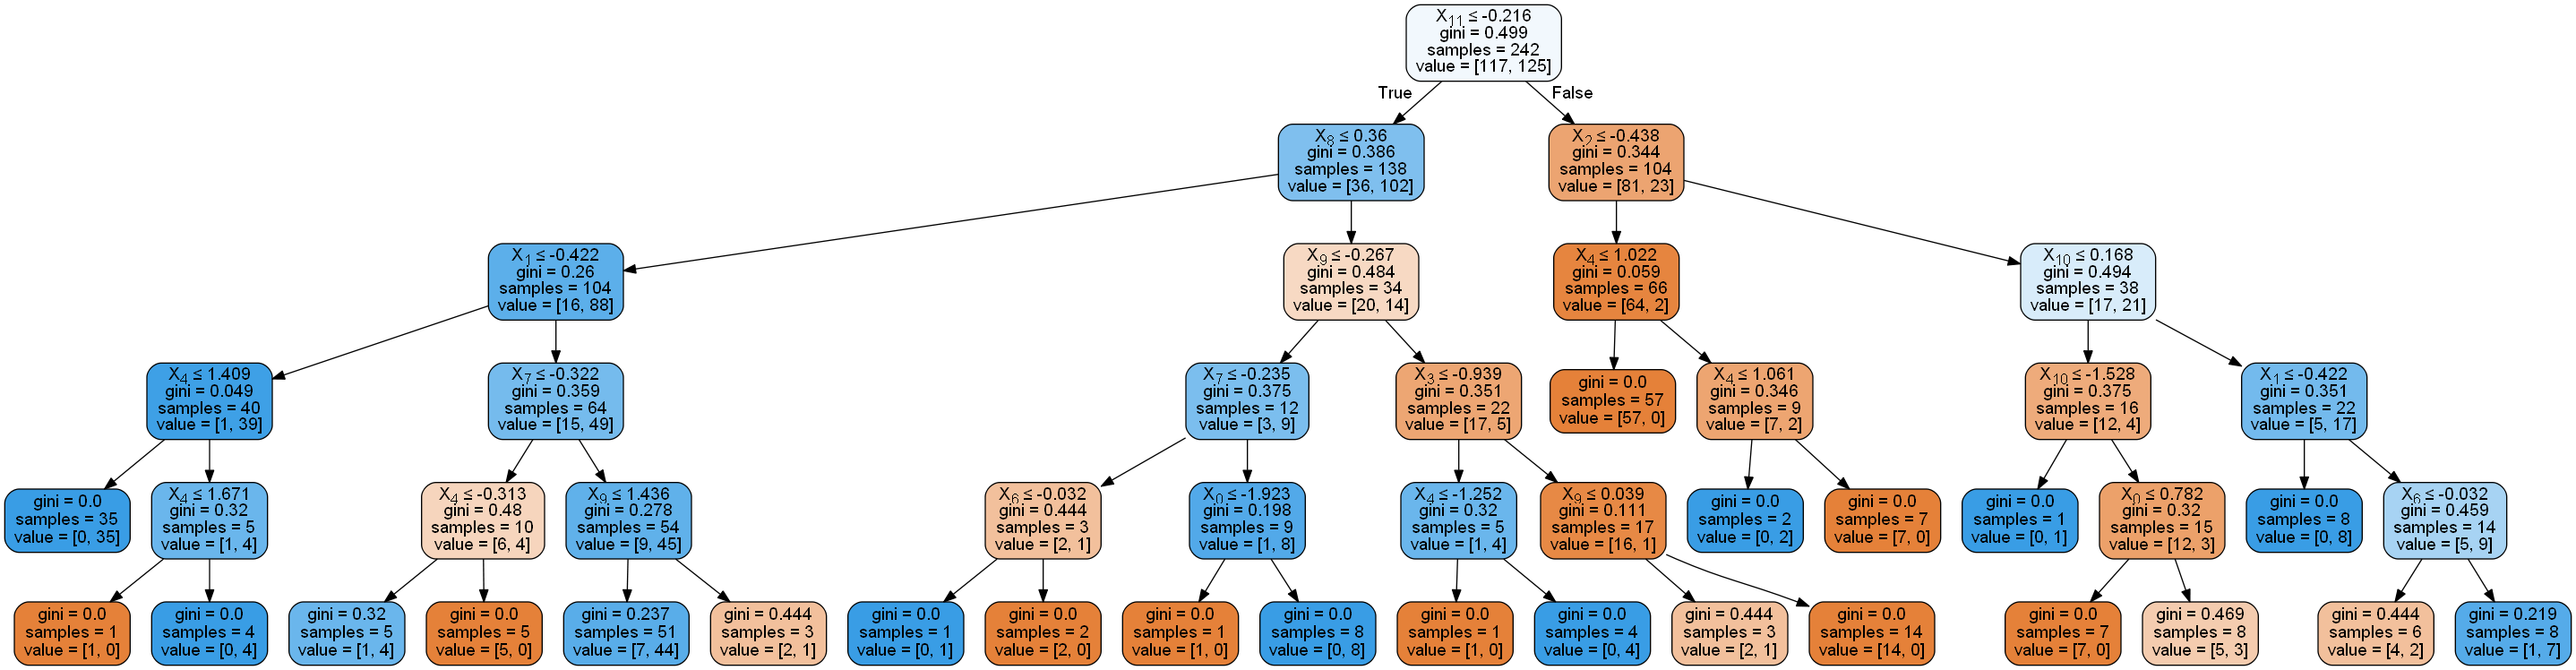

In [68]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Boosted Decision Tree

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada_boosted_dt = AdaBoostClassifier(learning_rate=1,
    base_estimator= classifier_dtree, n_estimators=70)

In [71]:
ada_boosted_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=70, random_state=None)

In [72]:
# Predicting the Test set results
y_pred = ada_boosted_dt.predict(X_test)

In [73]:
print("AdaBoosted Decision Tree, Classification Results:")

AdaBoosted Decision Tree, Classification Results:


Accuracy: 0.8032786885245902

Confusion Matrix:
[[16  5]
 [ 7 33]]


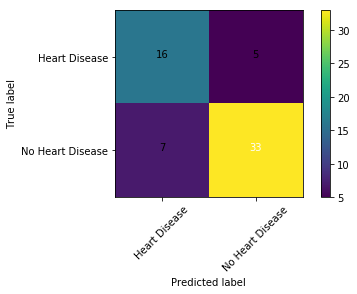

In [74]:
prediction_results(y_pred)

### Artificial Neural Networks

In [75]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [76]:
# Initialising the ANN
classifier = Sequential()

In [77]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=13, units=13, kernel_initializer="uniform"))

In [78]:
# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

In [79]:
# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=5, kernel_initializer="uniform"))

In [80]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [81]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [82]:
# Fitting the ANN to the Training set
history = classifier.fit(X, y, batch_size = 10, epochs = 155, validation_split=0.2)

Train on 242 samples, validate on 61 samples
Epoch 1/155
242/242 [==============================] - 0s 929us/step - loss: 0.2487 - acc: 0.6612 - val_loss: 0.2589 - val_acc: 0.0000e+00
Epoch 2/155
242/242 [==============================] - 0s 117us/step - loss: 0.2440 - acc: 0.6818 - val_loss: 0.2791 - val_acc: 0.0000e+00
Epoch 3/155
242/242 [==============================] - 0s 115us/step - loss: 0.2367 - acc: 0.6818 - val_loss: 0.3162 - val_acc: 0.0000e+00
Epoch 4/155
242/242 [==============================] - 0s 115us/step - loss: 0.2283 - acc: 0.6818 - val_loss: 0.3527 - val_acc: 0.0000e+00
Epoch 5/155
242/242 [==============================] - 0s 111us/step - loss: 0.2228 - acc: 0.6818 - val_loss: 0.3876 - val_acc: 0.0000e+00
Epoch 6/155
242/242 [==============================] - 0s 109us/step - loss: 0.2198 - acc: 0.6818 - val_loss: 0.4149 - val_acc: 0.0000e+00
Epoch 7/155
242/242 [==============================] - 0s 124us/step - loss: 0.2181 - acc: 0.6818 - val_loss: 0.4258 - va

242/242 [==============================] - 0s 107us/step - loss: 0.0967 - acc: 0.8802 - val_loss: 0.2256 - val_acc: 0.7213
Epoch 121/155
242/242 [==============================] - 0s 107us/step - loss: 0.0976 - acc: 0.8802 - val_loss: 0.1996 - val_acc: 0.7377
Epoch 122/155
242/242 [==============================] - 0s 106us/step - loss: 0.1364 - acc: 0.8264 - val_loss: 0.3520 - val_acc: 0.5738
Epoch 123/155
242/242 [==============================] - 0s 110us/step - loss: 0.1201 - acc: 0.8471 - val_loss: 0.3576 - val_acc: 0.5738
Epoch 124/155
242/242 [==============================] - 0s 111us/step - loss: 0.1280 - acc: 0.8430 - val_loss: 0.2652 - val_acc: 0.6721
Epoch 125/155
242/242 [==============================] - 0s 113us/step - loss: 0.0939 - acc: 0.8926 - val_loss: 0.2368 - val_acc: 0.6721
Epoch 126/155
242/242 [==============================] - 0s 112us/step - loss: 0.0929 - acc: 0.8926 - val_loss: 0.1510 - val_acc: 0.8033
Epoch 127/155
242/242 [==============================] 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


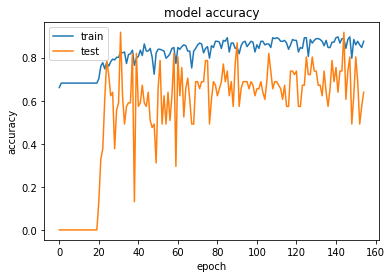

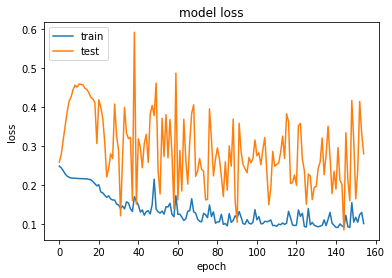

In [83]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
#Making the predictions and evaluating the model
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [85]:
print("Artificial Neural Network, Classification Results:")

Artificial Neural Network, Classification Results:


Accuracy: 0.8688524590163934

Confusion Matrix:
[[18  3]
 [ 5 35]]


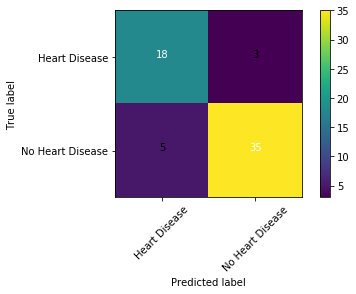

In [86]:
prediction_results(y_pred)

### Support Vector Machine

In [87]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf')
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
# Predicting the Test set results
y_pred = classifier_svm.predict(X_test)

In [89]:
print("Support Vector Machine, Classification Results:")

Support Vector Machine, Classification Results:


Accuracy: 0.8688524590163934

Confusion Matrix:
[[17  4]
 [ 4 36]]


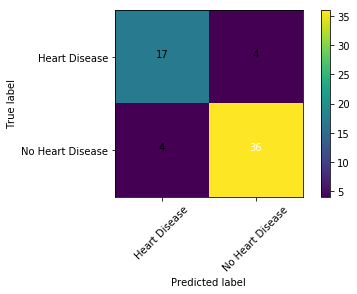

In [90]:
prediction_results(y_pred)

### k-Nearest Neighbors

#### Testing Different K-Values

In [91]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(p=2, n_neighbors=n_neighbors, algorithm="ball_tree")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

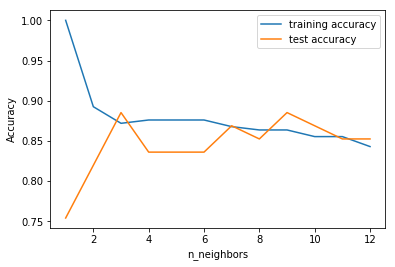

In [92]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Train Model

In [93]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=2, n_neighbors = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [94]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [95]:
print("K-nearest Neighbors, Classification Results:")

K-nearest Neighbors, Classification Results:


Accuracy: 0.8688524590163934

Confusion Matrix:
[[17  4]
 [ 4 36]]


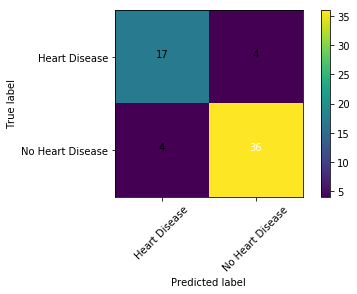

In [96]:
prediction_results(y_pred)

#### Visualize Results

In [97]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_pca = KNeighborsClassifier(n_neighbors = 11)
classifier_pca.fit(pca_2d(X_train, y_train, ret_x=True), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

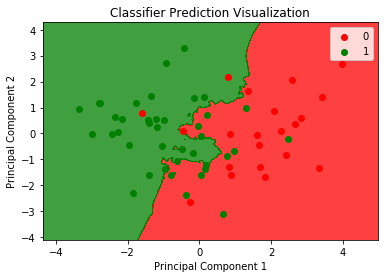

In [98]:
visualize_classifier(pca_2d(X_test, y_test, ret_x=True), y_test, classifier_pca)